<a href="https://colab.research.google.com/github/AttraqtiA/Cat-Dog-ImagePredictor/blob/main/Week3_CatDog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

rootPath = "/content/drive/MyDrive/Semester5_DSU/Advanced_AI/CatDogDataset"


In [2]:
imageGenerator = ImageDataGenerator(rescale=1./255,
                                    rotation_range=20,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    brightness_range=[.2,.2],
                                    horizontal_flip=True,
                                    validation_split=.2)

# We're going to split it into about 80%  train and 20% test

In [3]:
trainGen = imageGenerator.flow_from_directory(os.path.join(rootPath,'training_set'),
            target_size=(64,64),
            class_mode='binary', # ADD FOR BINARY
            subset='training')
validationGen = imageGenerator.flow_from_directory(os.path.join(rootPath,'training_set'),
            target_size=(64,64),
            class_mode='binary',
            subset='validation')

Found 6404 images belonging to 2 classes.
Found 1601 images belonging to 2 classes.


In [4]:
model = Sequential()
model.add(layers.InputLayer(input_shape=(64,64,3)))
model.add(layers.Conv2D(16,(3,3),(1,1),'same',activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.5))

model.add(layers.Conv2D(32, (3, 3), (1, 1), 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.5))

model.add(layers.Conv2D(64, (3, 3), (1, 1), 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.5))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

# Option 1: Single output neuron + sigmoid activation + binary_crossentropy loss for binary classification.
# Option 2: Two output neurons + softmax activation + categorical_crossentropy loss for categorical classification.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         262,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 287,905 (1.10 MB)

 Trainable params: 287,905 (1.10 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Create a program to read data from Kaggle

from tensorflow.keras import optimizers
from keras.callbacks import EarlyStopping

opt = optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=opt,
    loss='binary_crossentropy',
    metrics=['acc']
)

In [6]:
epochs = 200
es = EarlyStopping(monitor='val_loss', mode='min', patience=5)

history = model.fit(
    trainGen,
    epochs=epochs,
    steps_per_epoch=trainGen.samples // epochs,
    validation_data=validationGen,
    validation_steps=trainGen.samples // epochs,
    callbacks=[es]
)

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 929s 24s/step - acc: 0.4637 - loss: 0.6971 - val_acc: 0.4941 - val_loss: 0.6933
Epoch 2/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 357s 12s/step - acc: 0.5162 - loss: 0.6929 - val_acc: 0.4783 - val_loss: 0.6935
Epoch 3/200
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 128ms/step - acc: 0.4688 - loss: 0.6932

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


32/32 ━━━━━━━━━━━━━━━━━━━━ 302s 10s/step - acc: 0.5245 - loss: 0.6927 - val_acc: 0.5078 - val_loss: 0.6930
Epoch 4/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 184s 6s/step - acc: 0.4810 - loss: 0.6936 - val_acc: 0.4991 - val_loss: 0.6931
Epoch 5/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 195s 6s/step - acc: 0.5137 - loss: 0.6929 - val_acc: 0.4893 - val_loss: 0.6929
Epoch 6/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 170s 5s/step - acc: 0.5576 - loss: 0.6915 - val_acc: 0.5130 - val_loss: 0.6930
Epoch 7/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 480ms/step - acc: 0.5072 - loss: 0.6927 - val_acc: 0.5029 - val_loss: 0.6931
Epoch 8/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 161s 4s/step - acc: 0.5251 - loss: 0.6924 - val_acc: 0.5321 - val_loss: 0.6923
Epoch 9/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 101s 3s/step - acc: 0.5469 - loss: 0.6888 - val_acc: 0.5381 - val_loss: 0.6909
Epoch 10/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 92s 3s/step - acc: 0.5901 - loss: 0.6835 - val_acc: 0.5390 - val_loss: 0.6907
Epoch 11/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 90s 3s/step - acc: 0.5700

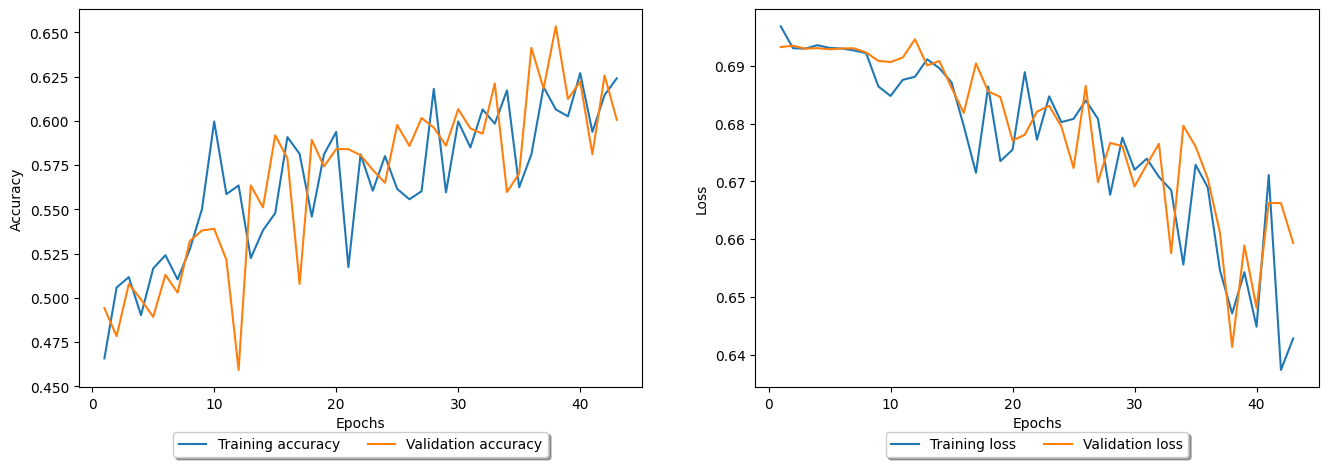

In [7]:
# matplotlib visualization

import matplotlib.pyplot as plt
from pylab import figure, axes, pie, title, savefig

def show_graph(history_dict):
  accuracy = history_dict['acc']
  val_accuracy = history_dict['val_acc']
  loss = history_dict['loss']
  val_loss = history_dict['val_loss']
  epochs = range(1, len(loss) + 1)
  plt.figure(figsize=(16, 2))
  plt.subplot(121)
  plt.subplots_adjust(top=2)
  plt.plot(epochs, accuracy, label='Training accuracy')
  plt.plot(epochs, val_accuracy, label='Validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
      fancybox=True, shadow=True, ncol=5)
# plt.legend(bbox_to_anchor=(1, -0.1))

  plt.subplot(122)
  plt.plot(epochs, loss, label='Training loss')
  plt.plot(epochs, val_loss, label='Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
  fancybox=True, shadow=True, ncol=5)
# plt.legend(bbox_to_anchor=(1, 0))

  fig = plt.gcf()
  plt.show()

show_graph(history.history)

In [8]:
testGenerator = ImageDataGenerator(
  rescale=1./255
)

testGen = imageGenerator.flow_from_directory(
  os.path.join(rootPath, 'test_set'),
  target_size=(64, 64),
  class_mode='binary'
)

model.evaluate(testGen)

Found 2006 images belonging to 2 classes.
63/63 ━━━━━━━━━━━━━━━━━━━━ 664s 11s/step - acc: 0.6269 - loss: 0.6543


[0.6556981205940247, 0.6211366057395935]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Prediction: CAT
Answer: CAT


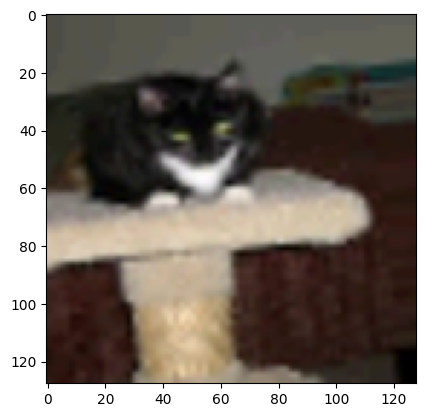

In [18]:
from tensorflow.keras.preprocessing.image import array_to_img
import numpy as np

cls_index = ['CAT', 'DOG']
imgs = next(testGen)
arr = imgs[0][0]
img = array_to_img(arr).resize((128, 128))
plt.imshow(img)
result = model.predict(arr.reshape(1, 64, 64, 3))

# Find the class index with the highest probability
predicted_class = np.argmax(result[0])
print('Prediction: {}'.format(cls_index[predicted_class]))
print('Answer: {}'.format(cls_index[np.argmax(imgs[1][0])]))